# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
y = kill.groupby("gender").gender.count().sort_values(ascending=False)
y

gender
M    2428
F     107
Name: gender, dtype: int64

In [6]:
x = kill.gender.value_counts().index
len(x)
x

Index(['M', 'F'], dtype='object')

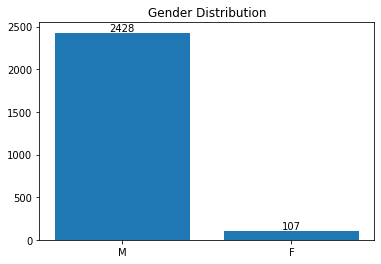

In [45]:
# with matplotlib
plt.xticks(range(len(x)),x)
plt.title("Gender Distribution")
for index, value in enumerate(y):
    plt.text(index, value, str(value), ha="center",va="bottom")
plt.bar(x,y)
plt.show()


## 2: Plot 7 most common kill weapons

In [11]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [12]:
weapons = kill.groupby("armed").armed.count().sort_values(ascending=False).head(7)
weapons

armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [33]:
ind = pd.Series(weapons.index)
ind

0               gun
1             knife
2           vehicle
3           unarmed
4      undetermined
5        toy weapon
6    unknown weapon
Name: armed, dtype: object

In [40]:
for index, value in enumerate(weapons):
    print(index,value)

0 1398
1 373
2 177
3 171
4 117
5 104
6 18


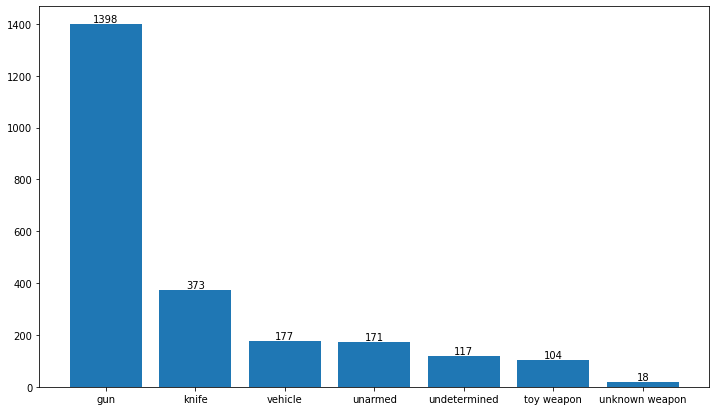

In [180]:
# with matplotlib
plt.figure(figsize =(12,7))
plt.bar(ind, weapons,)
for index, value in enumerate(weapons):
    plt.text(index, value, str(value), ha="center",va="bottom")
plt.show()

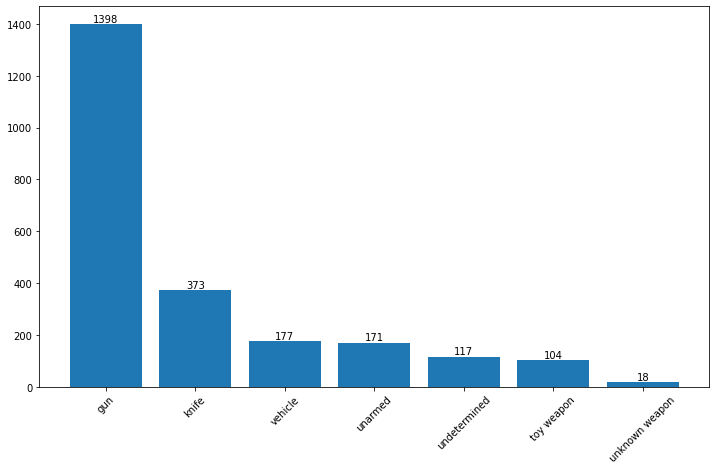

In [193]:
# with matplotlib
plt.figure(figsize =(12,7))
plt.bar(ind, weapons)
for index, value in enumerate(weapons):
    plt.text(index, value, str(value), ha="center",va="bottom")
plt.xticks(rotation=45)
plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [68]:
kill["age_cat"] = kill.age.apply(lambda x : "above25" if x > 25 else "below25")


In [70]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [73]:
age_c = kill.age_cat.value_counts()
age_c

above25    1905
below25     630
Name: age_cat, dtype: int64

In [74]:
age_c.index

Index(['above25', 'below25'], dtype='object')

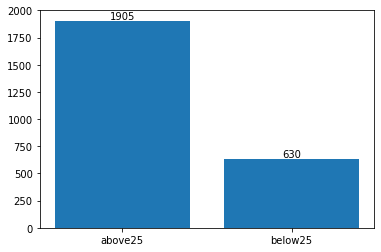

In [81]:
# with matplotlib
plt.bar(age_c.index, age_c)
for index, value in enumerate(age_c):
    plt.text(index, value, str(value), ha="center", va="bottom")

## 4: Plot number of killed poeple by race

In [86]:
race_c = kill.groupby("race").race.count().sort_values(ascending=False)
race_c

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

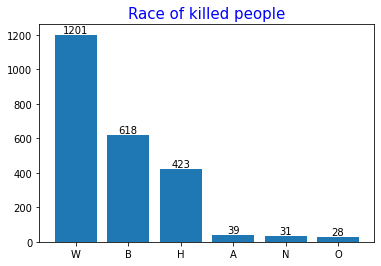

In [179]:
# with matplotlib
plt.bar(race_c.index,race_c)
for index, value in enumerate(race_c):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.title("Race of killed people",fontdict={"size":15,"color":"blue"})
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [91]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [101]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [113]:
kill.groupby("race",dropna=False).race.count().sort_values(ascending=False)

race
W      1201
B       618
H       423
A        39
N        31
O        28
NaN       0
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [119]:
kill.dropna(inplace=True)

In [121]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [125]:
race_c2 = kill.race.value_counts()
race_c2

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [126]:
race_c2.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [152]:
race_c2.values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

In [166]:
race_c2.size

6

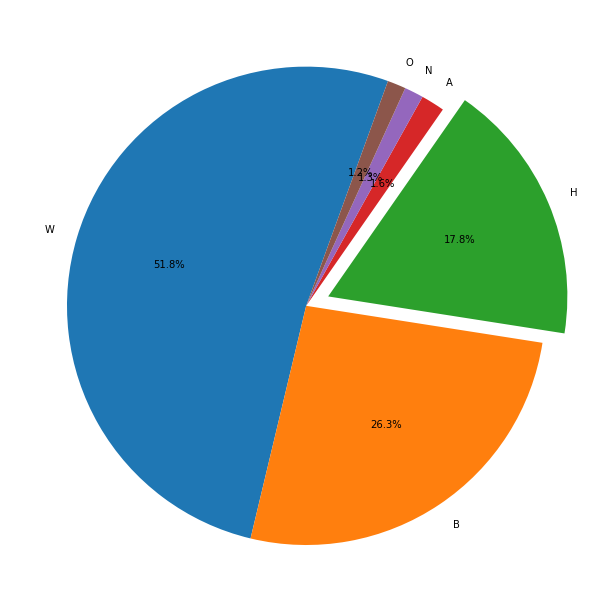

In [169]:
# matplotlib
explode1 = (0,0,0.1,0,0,0)
plt.figure(figsize=(25,11))
plt.pie(race_c2.values,labels=race_c2.index,startangle=70,autopct="%.1f%%",explode=explode1)
plt.show()

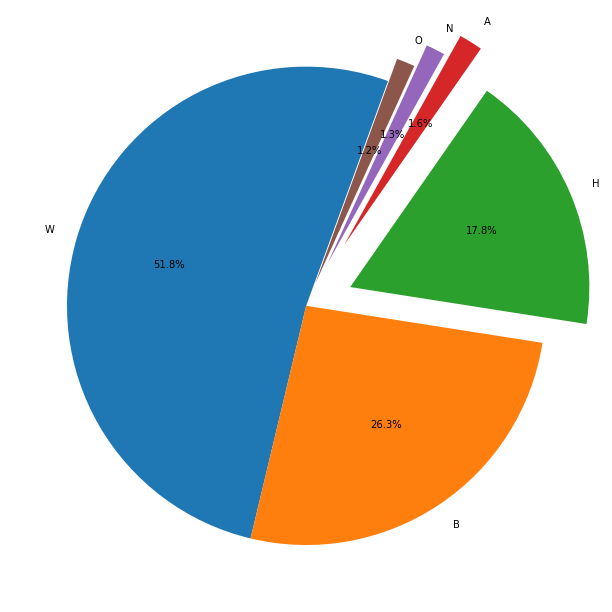

In [172]:
explode1 = (0,0,0.2,0.3,0.2,0.1)
plt.figure(figsize=(25,11))
plt.pie(race_c2.values,labels=race_c2.index,startangle=70,autopct="%.1f%%",explode=explode1)
plt.show()

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [45]:
name_list = []
for i in kill.name:
    name_list.append(i.split(" "))
all_names = []
all_surnames = []


In [46]:
for i in name_list:
    all_surnames.append(i[-1])
    i.remove(i[-1])

In [47]:
for i in name_list:
    for n in range(len(i)):
        all_names.append(i[n])

In [48]:
len(all_names)

3512

In [49]:
len(all_surnames)

2535

In [50]:
len(name_list)

2535

In [58]:
all_names_pd = pd.Series(all_names)
all_names_pd.head()

0      Tim
1    Lewis
2      Lee
3     John
4     Paul
dtype: object

In [57]:
all_surnames_pd = pd.Series(all_surnames)
all_surnames_pd.head()

0       Elliot
1       Lembke
2     Quintero
3      Hoffman
4    Rodriguez
dtype: object

In [81]:
all_names_pd.value_counts()

Michael       90
David         57
James         55
TK            51
Robert        48
              ..
Hugo           1
Tuan           1
Jozefowicz     1
Tashfeen       1
Deltra         1
Length: 1186, dtype: int64

In [86]:
all_names_pd.value_counts()[9]

41

In [70]:
kill.name.isnull().value_counts()

False    2535
Name: name, dtype: int64